<IPython.core.display.Javascript object>


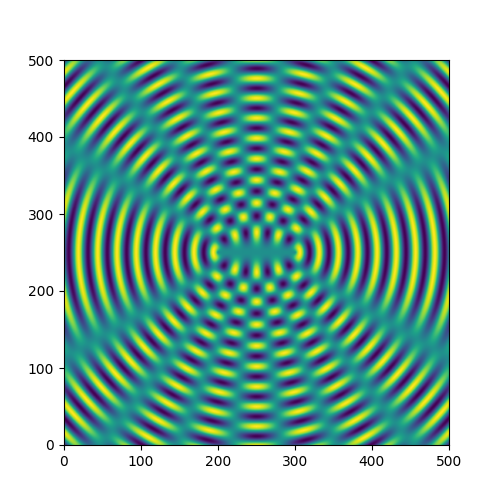

In [1]:
#A program to simulate wave interference due to pebbles being
#dropped in water with an interactive interface

%matplotlib notebook

import matplotlib.pyplot as plt
from math import sqrt,sin,pi
import ipywidgets as widgets
import numpy as np
from matplotlib import animation


#Constants
wavelength = 5.0
k = 2*pi/wavelength
ho = 1.0               # Amplitude
separation = 20.0      # Separation of centers in cm
side = 100.0           # Side of the square in cm
points = 500           # Number of grid points along each side
spacing = side/points  # Spacing of points in cm

# Calculate the positions of the centers of the circles
x1 = side/2 + separation/2
y1 = side/2
x2 = side/2 - separation/2
y2 = side/2

#Set up empty grid to simulate no pebbles in water
fig = plt.figure(figsize=[5,5]) 
ax = plt.axes(xlim=(0, points), ylim=(0, points))
xo1 = np.random.random((points,points))
plt.imshow(xo1, origin="lower", extent=[0,points,0,points],
                animated=True)


#For one pebble dropped
xio = np.empty([points,points],float) #array to store heights
def f1(xi1,yi1):
    '''
    function to calculate the array values for one pebble
    '''
    for i in range(points):
        yi1 = spacing*i
        for j in range(points):
            xi1 = spacing*j
            ri1 = sqrt((xi1-x1)**2+(yi1-y1)**2)
            xio[i,j] = ho*sin(k*ri1)
    return xio


#For two pebbles dropped
h = np.empty([points,points],float) #array to store heights
def f2(xi2,yi2):
    '''
    function to calculate the array values for two pebbles
    '''
    for i in range(points):
        yi2 = spacing*i
        for j in range(points):
            xi2 = spacing*j
            r1 = sqrt((xi2-x1)**2 + (yi2-y1)**2)
            r2 = sqrt((xi2-x2)**2 + (yi2-y2)**2)
            h[i,j] = ho*sin(k*r1) + ho*sin(k*r2)
    return h


#For the animation
def updatefig(*args):
    '''
    function to update the grid each frame
    '''
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,


#Set up buttons
start = widgets.Button(description='Start')
drop = widgets.Button(description='Drop Pebble')
cont = widgets.Button(description='Continue')
terminate = widgets.Button(description='Terminate')

#Call the animator
ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()

#Make the buttons usable with the program functions
out = widgets.Output()

def start_button_clicked(_):
    '''
    function to enable start button
    '''
    with out:
        xi1 = np.linspace(0, 2 * np.pi, 120)
        yi1 = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
        plt.imshow(f1(xi1,yi1), animated=True)

def drop_button_clicked(_):
    '''
    function to enable drop pebble button
    '''
    with out:
        xi2 = np.linspace(0, 2 * np.pi, 120)
        yi2 = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
        plt.imshow(f2(xi2,yi2), animated=True)
        
def term_button_clicked(_):
    '''
    function to enable terminate button
    '''
    with out:
        ani.event_source.stop()
        
#Call button functions        
start.on_click(start_button_clicked)
drop.on_click(drop_button_clicked)
terminate.on_click(term_button_clicked)

#Display buttons
widgets.HBox([start,drop,terminate,out])
